In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
%matplotlib inline

In [9]:
def plot_raw_matrix(corr_mat):
    #fig, ax = plt.figure(figsize=(10,5))
    ms = plt.matshow(corr_mat, interpolation="nearest",
               vmax=1, vmin=-1, cmap='RdBu_r')
    plt.colorbar(ms)

In [10]:
def plot_thresh_matrix(corr_mat):
    #fig, ax = plt.figure(figsize=(10,5))
    ms = plt.matshow(corr_mat, interpolation="nearest",
               vmax=1, vmin=0, cmap='viridis')
    plt.colorbar(ms)

In [11]:
sns.set(context='notebook')
sns.set(style='white')

### Naive mice

Load the correlation of cFos co-activations across naive animals.

In [3]:
naive_df = pd.read_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/data/cFosCAN_alcohol_naive_orig_20180326.csv')

Drop the column of brain area labels.


In [4]:
naive_data = naive_df.iloc[0:, 1:]

Save a new version of the raw correlation values without row or column labels.

In [5]:
naive_data.to_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/data/cFosCAN_alcohol_naive_mat_20180326.csv', index=None, header=None)

Get the correlatoin values as an array.


In [6]:
naive_data_array = naive_data.values

Zero-out self correlations.

In [7]:
np.fill_diagonal(naive_data_array, 0)

Plot the raw correlation matrix.

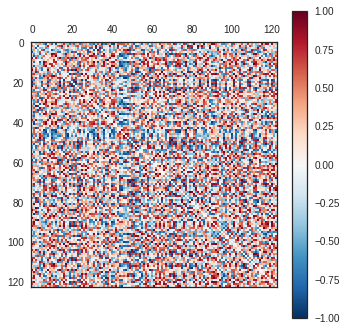

In [12]:
plot_raw_matrix(naive_data_array)

Plot the distribution of correlation coefficients.

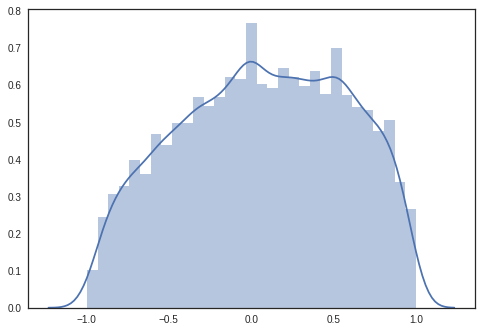

In [13]:
sns.distplot(naive_data_array.ravel())

Threshold the correlation matrix with a connection density of 5%.

In [14]:
naive_95pctl = stats.scoreatpercentile(naive_data_array, 95)

In [15]:
naive_95pctl

0.851272472

In [16]:
naive_95pctl_mask = (naive_data_array <= naive_95pctl)

In [17]:
naive_data_array[naive_95pctl_mask] = 0

Save the thresholded matrix.

In [19]:
naive_data_95pctl = pd.DataFrame(naive_data_array)

In [20]:
naive_data_95pctl.to_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/data/cFosCAN_alcohol_naive_mat_95pctl_20180326.csv', index=None, header=None)

Identify areas that have been disconnected.

In [24]:
naive_data_95pctl.columns = naive_df.columns[1:]

We lose the following regions due to disconnection:

In [25]:
naive_data_95pctl.columns[(naive_data_95pctl == 0).all()]

Index(['Dorsal auditory area', 'Lateral hypothalamic area',
       'Ventral auditory area', 'Retrosplenial area dorsal part'],
      dtype='object')

#### Visualize community structure and nodal roles.

For the thresholded matrix.

In [141]:
naive_data_95pctl_reordered = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/naive_95pctl/naive_95pctl_ReorderedMatrix.txt').reshape((123,123))

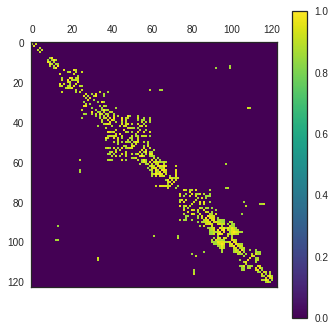

In [142]:
plot_thresh_matrix(naive_data_95pctl_reordered)

In [143]:
naive_95pctl_pc = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/naive_95pctl/naive_95pctl_PC.txt')

In [144]:
naive_95pctl_wdz = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/naive_95pctl/naive_95pctl_WMDz.txt')

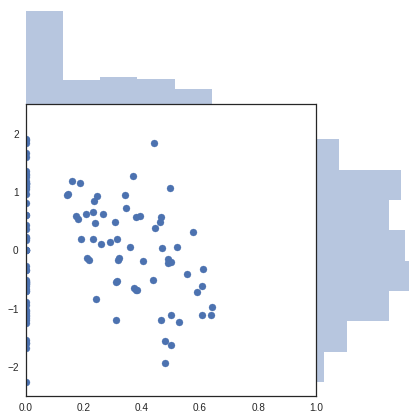

In [146]:
grid = sns.jointplot(naive_95pctl_pc, naive_95pctl_wdz, kind='scatter',space=0, stat_func=None, xlim=(0,1), ylim=(-2.5, 2.5), ratio=3)

## Air Group

Load the correlation of cFos co-activations across animals exposed to air but given access to alcohol.

In [26]:
air_df = pd.read_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/data/cFosCAN_alcohol_air_orig_20180326.csv')

Drop the column of brain area labels.


In [27]:
air_data = air_df.iloc[0:, 1:]

Save a new version of the raw correlation values without row or column labels.

In [28]:
air_data.to_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/data/cFosCAN_alcohol_air_mat_20180326.csv', index=None, header=None)

Get the correlatoin values as an array.


In [29]:
air_data_array = air_data.values

Zero-out self correlations.

In [30]:
np.fill_diagonal(air_data_array, 0)

Plot the raw correlation matrix.

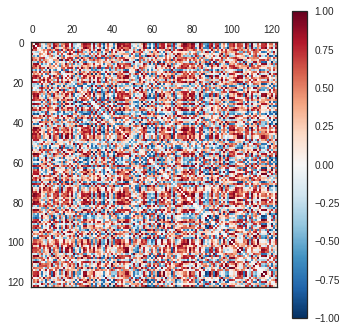

In [31]:
plot_raw_matrix(air_data_array)

Plot the distribution of correlation coefficients.

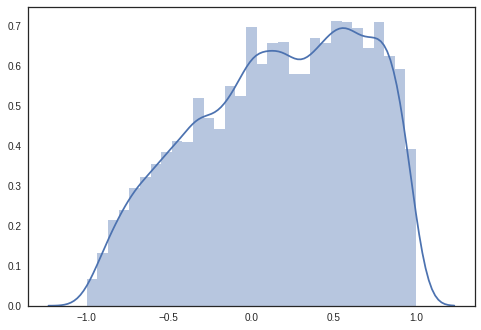

In [32]:
sns.distplot(air_data_array.ravel())

Threshold the correlation matrix with a connection density of 5%.

In [33]:
air_95pctl = stats.scoreatpercentile(air_data_array, 95)

In [34]:
air_95pctl

0.88852310600000006

In [35]:
air_95pctl_mask = (air_data_array <= air_95pctl)

In [36]:
air_data_array[air_95pctl_mask] = 0

Save the thresholded matrix.

In [37]:
air_data_95pctl = pd.DataFrame(air_data_array)

In [38]:
air_data_95pctl.to_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/data/cFosCAN_alcohol_air_mat_95pctl_20180326.csv', index=None, header=None)

We lose the following regions due to disconnection:

In [40]:
air_data_95pctl.columns = air_df.columns[1:]

In [42]:
air_data_95pctl.columns[(air_data_95pctl == 0).all()]

Index(['Primary visual area', 'Parasubthalamic nucleus',
       'Endopiriform nucleus', 'Prelimbic area', 'Field CA2',
       'Lateral amygdalar nucleus',
       'Ventral anterior-lateral complex of the thalamus',
       'Medial amygdalar nucleus'],
      dtype='object')

#### Visualize community structure and nodal roles.

For the unthresholded matrix.

In [171]:
air_data_95pctl_reordered = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/air_95pctl/air_95pctl_ReorderedMatrix.txt').reshape((123,123))

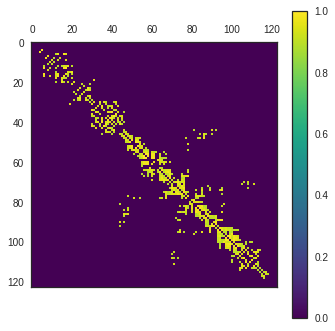

In [172]:
plot_thresh_matrix(air_data_95pctl_reordered)

In [173]:
air_95pctl_pc = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/air_95pctl/air_95pctl_PC.txt')

In [174]:
air_95pctl_wdz = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/air_95pctl/air_95pctl_WMDz.txt')

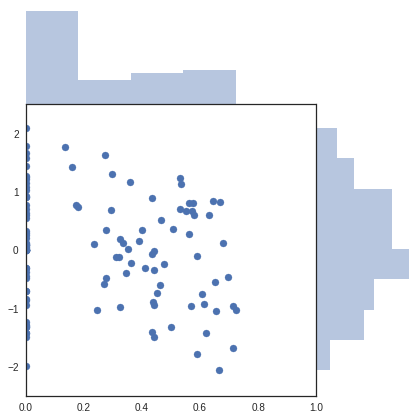

In [175]:
grid = sns.jointplot(air_95pctl_pc, air_95pctl_wdz, kind='scatter',space=0, stat_func=None, xlim=(0,1), ylim=(-2.5, 2.5), ratio=3)

## Withdrawal Group

Load the correlation of cFos co-activations across animals in withdrawal

In [43]:
withdrawal_df = pd.read_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/data/cFosCAN_alcohol_withdrawal_orig_20180326.csv')

Drop the column of brain area labels.


In [44]:
withdrawal_data = withdrawal_df.iloc[0:, 1:]

Save a new version of the raw correlation values without row or column labels.

In [47]:
withdrawal_data.to_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/data/cFosCAN_alcohol_withdrawal_mat_20180326.csv', index=None, header=None)

Get the correlatoin values as an array.


In [48]:
withdrawal_data_array = withdrawal_data.values

Zero-out self correlations.

In [49]:
np.fill_diagonal(withdrawal_data_array, 0)

Plot the raw correlation matrix.

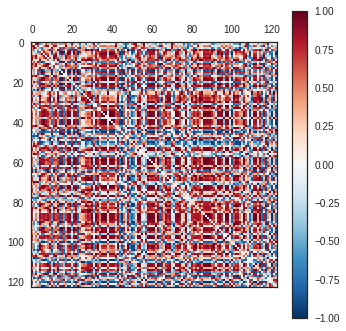

In [50]:
plot_raw_matrix(withdrawal_data_array)

Plot the distribution of correlation coefficients.

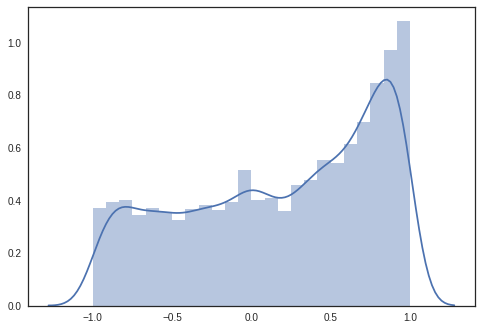

In [51]:
sns.distplot(withdrawal_data_array.ravel())

Threshold the correlation matrix with a connection density of 5%.

In [52]:
withdrawal_95pctl = stats.scoreatpercentile(withdrawal_data_array, 95)

In [53]:
withdrawal_95pctl

0.95767643000000002

In [54]:
withdrawal_95pctl_mask = (withdrawal_data_array <= withdrawal_95pctl)

In [55]:
withdrawal_data_array[withdrawal_95pctl_mask] = 0

Save the thresholded matrix.

In [56]:
withdrawal_data_95pctl = pd.DataFrame(withdrawal_data_array)

In [57]:
withdrawal_data_95pctl.to_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/data/cFosCAN_alcohol_withdrawal_95pctl_mat_20180316.csv', index=None, header=None)

We lose the following regions due to disconnection:

In [58]:
withdrawal_data_95pctl.columns = withdrawal_df.columns[1:]

In [59]:
withdrawal_data_95pctl.columns[(withdrawal_data_95pctl == 0).all()]

Index(['Pons motor related', 'Subiculum', 'Parasubthalamic nucleus', 'Culmen',
       'Entorhinal area lateral part', 'Medial habenula',
       'Subparaventricular zone', 'Claustrum',
       'Paraventricular nucleus of the thalamus',
       'Periventricular hypothalamic nucleus posterior part',
       'Median preoptic nucleus', 'Posterior amygdalar nucleus',
       'Retrosplenial area ventral part', 'Olivary pretectal nucleus',
       'Precommissural nucleus', 'Lateral habenula', 'Medial pretectal area'],
      dtype='object')

#### Visualize community structure and nodal roles.

For the unthresholded matrix.

In [171]:
air_data_95pctl_reordered = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/air_95pctl/air_95pctl_ReorderedMatrix.txt').reshape((123,123))

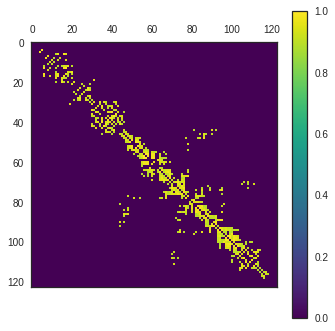

In [172]:
plot_thresh_matrix(air_data_95pctl_reordered)

In [173]:
air_95pctl_pc = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/air_95pctl/air_95pctl_PC.txt')

In [174]:
air_95pctl_wdz = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/air_95pctl/air_95pctl_WMDz.txt')

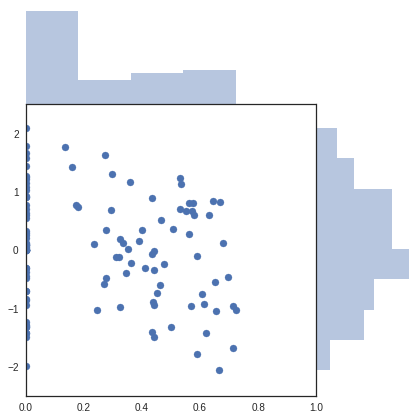

In [175]:
grid = sns.jointplot(air_95pctl_pc, air_95pctl_wdz, kind='scatter',space=0, stat_func=None, xlim=(0,1), ylim=(-2.5, 2.5), ratio=3)

In [182]:
air_region_assignments = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/air_95pctl/air_95pctl_GraphPartition.txt')

In [185]:
np.unique(air_region_assignments, return_counts=True)

(array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.]),
 array([17,  7, 15,  6,  9, 15, 10,  8,  2,  4, 11, 11,  1,  1,  1,  1,  1,
         1,  1,  1]))

In [187]:
air_region_assignment_labeled = pd.Series(air_region_assignments, control_df.iloc[:,0].values)

In [195]:
air_region_assignment_labeled[air_region_assignment_labeled == 8]

Central medial nucleus of the thalamus                 8.0
Anteroventral preoptic nucleus                         8.0
Suprachiasmatic nucleus                                8.0
Anteroventral periventricular nucleus                  8.0
Paraventricular nucleus of the thalamus                8.0
Parataenial nucleus                                    8.0
Periventricular hypothalamic nucleus posterior part    8.0
Median preoptic nucleus                                8.0
dtype: float64

## Coompare nodal roles between control and experimental groups

### Participation Coefficient

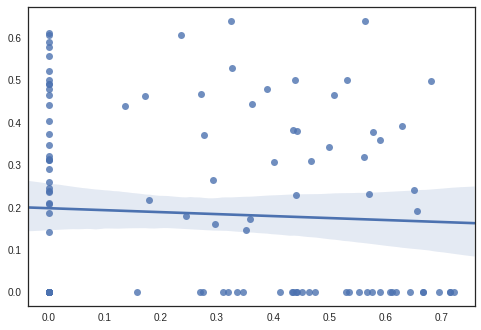

In [177]:
sns.regplot(air_95pctl_pc, naive_95pctl_pc)

In [178]:
air_naive_pc_diffs = air_95pctl_pc - naive_95pctl_pc

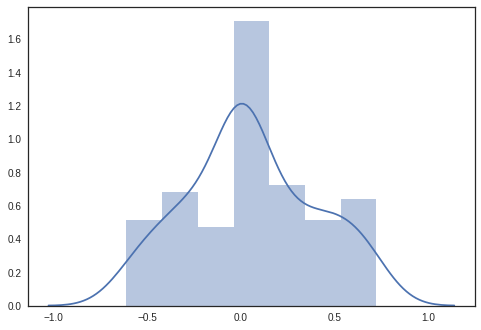

In [179]:
sns.distplot(air_naive_pc_diffs)

In [180]:
air_naive_pc_diffs_labeled = pd.Series(air_naive_pc_diffs, control_df.iloc[:,0].values)

In [181]:
air_naive_pc_diffs_labeled.sort_values()

Ventral medial nucleus of the thalamus          -0.611290
Anterolateral visual area                       -0.604984
Field CA2                                       -0.589502
Superior colliculus motor related               -0.576730
Endopiriform nucleus                            -0.556584
Dorsal part of the lateral geniculate complex   -0.521853
Inferior colliculus                             -0.499414
Primary somatosensory area upper limb           -0.490253
Primary somatosensory area mouth                -0.490117
Field CA1                                       -0.479032
Anterodorsal nucleus                            -0.465425
Median preoptic nucleus                         -0.441839
Primary visual area                             -0.404352
Orbital area ventrolateral part                 -0.371873
Lateral posterior nucleus of the thalamus       -0.371124
Basolateral amygdalar nucleus                   -0.346015
Field CA3                                       -0.321313
Perirhinal are

### Within-module Degree (z-score)

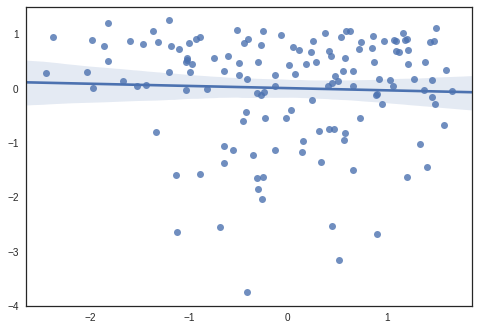

In [77]:
sns.regplot(control_raw_wdz, withdrawal_raw_wdz)

In [92]:
wdz_diffs = withdrawal_raw_wdz- control_raw_wdz

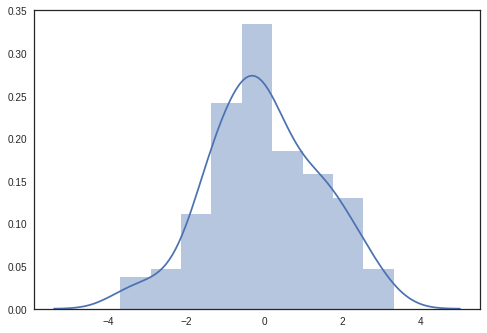

In [93]:
sns.distplot(wdz_diffs)

In [94]:
wdz_diffs_labeled = pd.Series(wdz_diffs, control_df.iloc[:,0].values)

In [95]:
wdz_diffs_labeled.sort_values()

Median preoptic nucleus                               -3.681014
Nucleus accumbens                                     -3.584843
Posterior amygdalar nucleus                           -3.330360
Primary auditory area                                 -2.975254
Pallidum                                              -2.854477
Retrosplenial area ventral part                       -2.835294
Claustrum                                             -2.362625
Perirhinal area                                       -2.256847
Anterior cingulate area ventral part                  -2.166599
Postsubiculum                                         -1.859239
Substantia innominata                                 -1.777188
Periventricular hypothalamic nucleus posterior part   -1.765165
Medial preoptic nucleus                               -1.720395
Fundus of striatum                                    -1.706189
medial forebrain bundle system                        -1.623155
Medial geniculate complex               

In [205]:
stats.pearsonr(naive_df.iloc[0:, 1:].as_matrix().ravel(), air_df.iloc[0:, 1:].as_matrix().ravel())

(0.087196686181421401, 6.2714206642774585e-27)

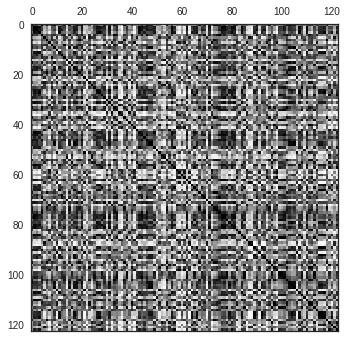

In [207]:
plt.matshow(air_df.iloc[0:, 1:].as_matrix())

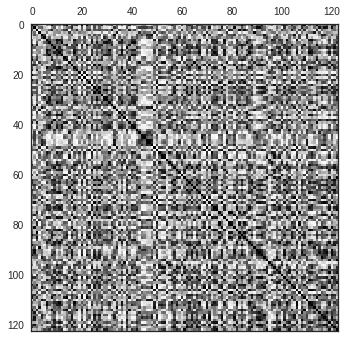

In [202]:
plt.matshow(naive_df.iloc[0:, 1:].as_matrix())

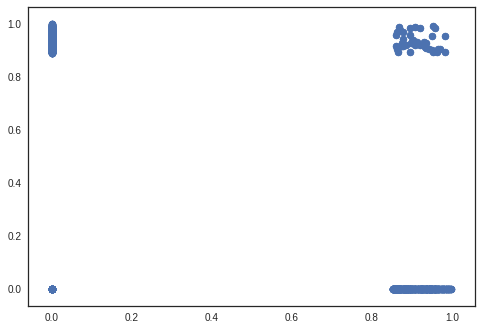

In [197]:
plt.scatter(naive_data_array.ravel(), air_data_array.ravel())